AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 2.5 		 0.3 		 0.4 |
| 6.2 		 0.3 		 0.4 |
| 3.9 		 0.3 		 0.4 |
| 9.4 		 0.3 		 0.4 |
| 4.8 		 0.3 		 0.4 |
| 2.7 		 0.3 		 0.4 |
| 4.3 		 0.3 		 0.4 |
| 4.3 		 0.3 		 0.4 |
| 2.7 		 0.3 		 0.4 |
| 2.7 		 0.3 		 0.4 |
| 2.6 		 0.3 		 0.4 |
| 7.9 		 0.3 		 0.4 |
| 9.0 		 0.3 		 0.4 |
| 6.8 		 0.3 		 0.4 |
| 9.8 		 0.3 		 0.4 |
| 2.6 		 0.3 		 0.4 |
| 3.0 		 0.3 		 0.4 |
| 4.6 		 0.3 		 0.4 |
| 4.1 		 0.3 		 0.4 |
-------------------------------------
The s.d. of M is: 2.01
The s.d. of D is: 0.0
The s.d. of R is: 0.0
-------------------------------------
The mean of M is: 4.79
The mean of D is: 0.4
The mean of R is: 0.3
-------------------------------------


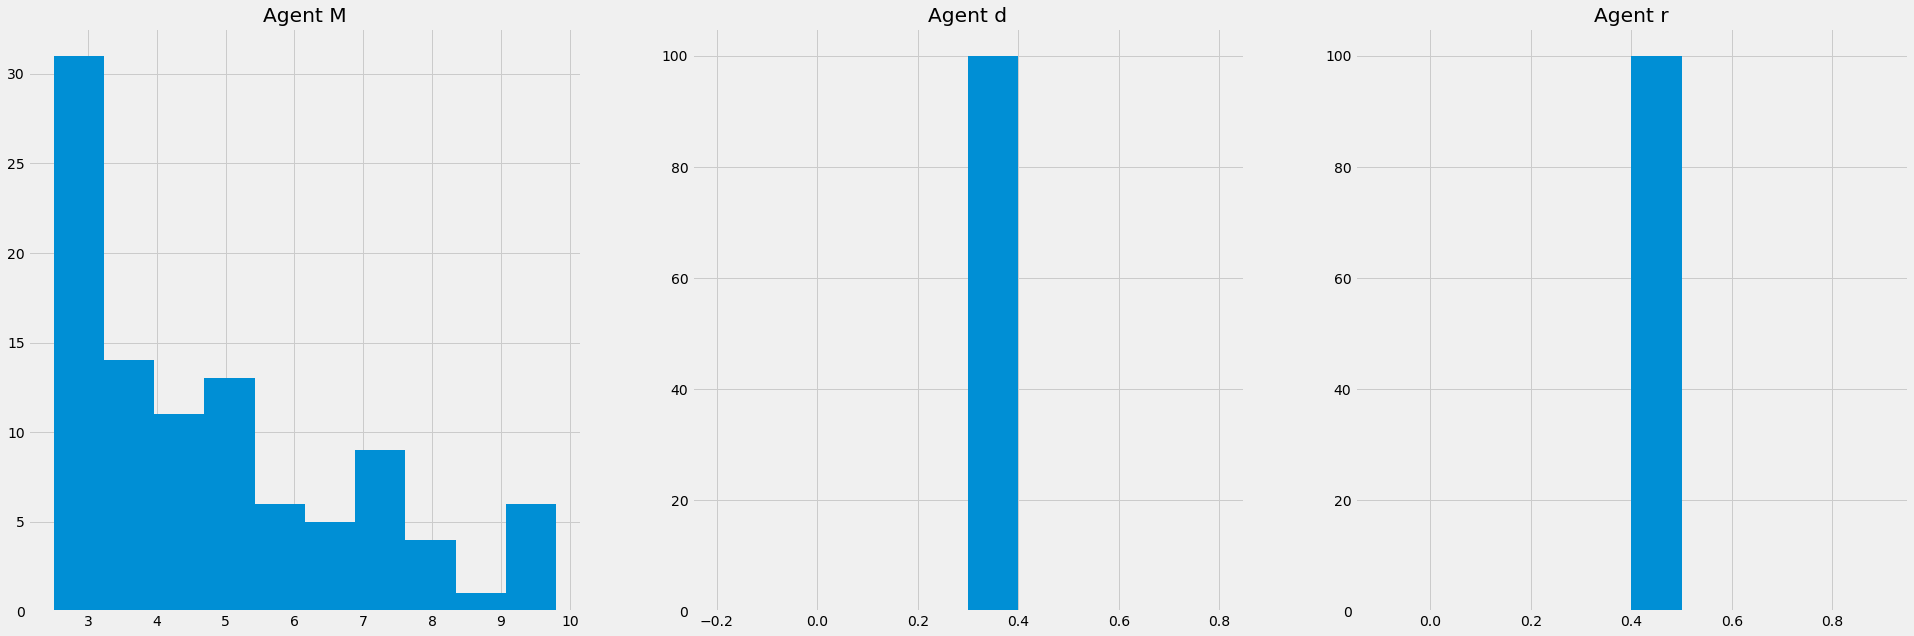

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 4.3, Temptation: 6.8, Sucker: 0, Punishment: 2.5
Agent 1 playing Agent 0: Reward: 1.8, Temptation: 2.8, Sucker: 0, Punishment: 1.0
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 2.7, Temptation: 4.3, Sucker: 0, Punishment: 1.6
Agent 2 playing Agent 0: Reward: 1.8, Temptation: 2.8, Sucker: 0, Punishment: 1.0
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 6.6, Temptation: 10.3, Sucker: 0, Punishment: 3.8
Agent 3 playing Agent 0: Reward: 1.8, Temptation: 2.8, Sucker: 0, Punishment: 1.0
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 3.4, Temptation: 5.3, Sucker: 0, Punishment: 1.9
Agent 4 playing Agent

No handles with labels found to put in legend.


    S.D.  Counts
0    0.5     244
1    0.6     260
2    0.7     221
3    0.8     214
4    0.9     194
5    1.0     197
6    1.1     178
7    1.2     160
8    1.3     157
9    1.4     134
10   1.5     109
11   1.6      93
12   1.7      73
13   1.8      64
14   1.9      53
15   2.0      40
16   2.1      33
17   2.2      22
18   2.3      11
19   2.4       6
20   2.5       2
21   2.6       3
22   2.7       3
23   2.8       0
24   2.9       0
25   3.0       0


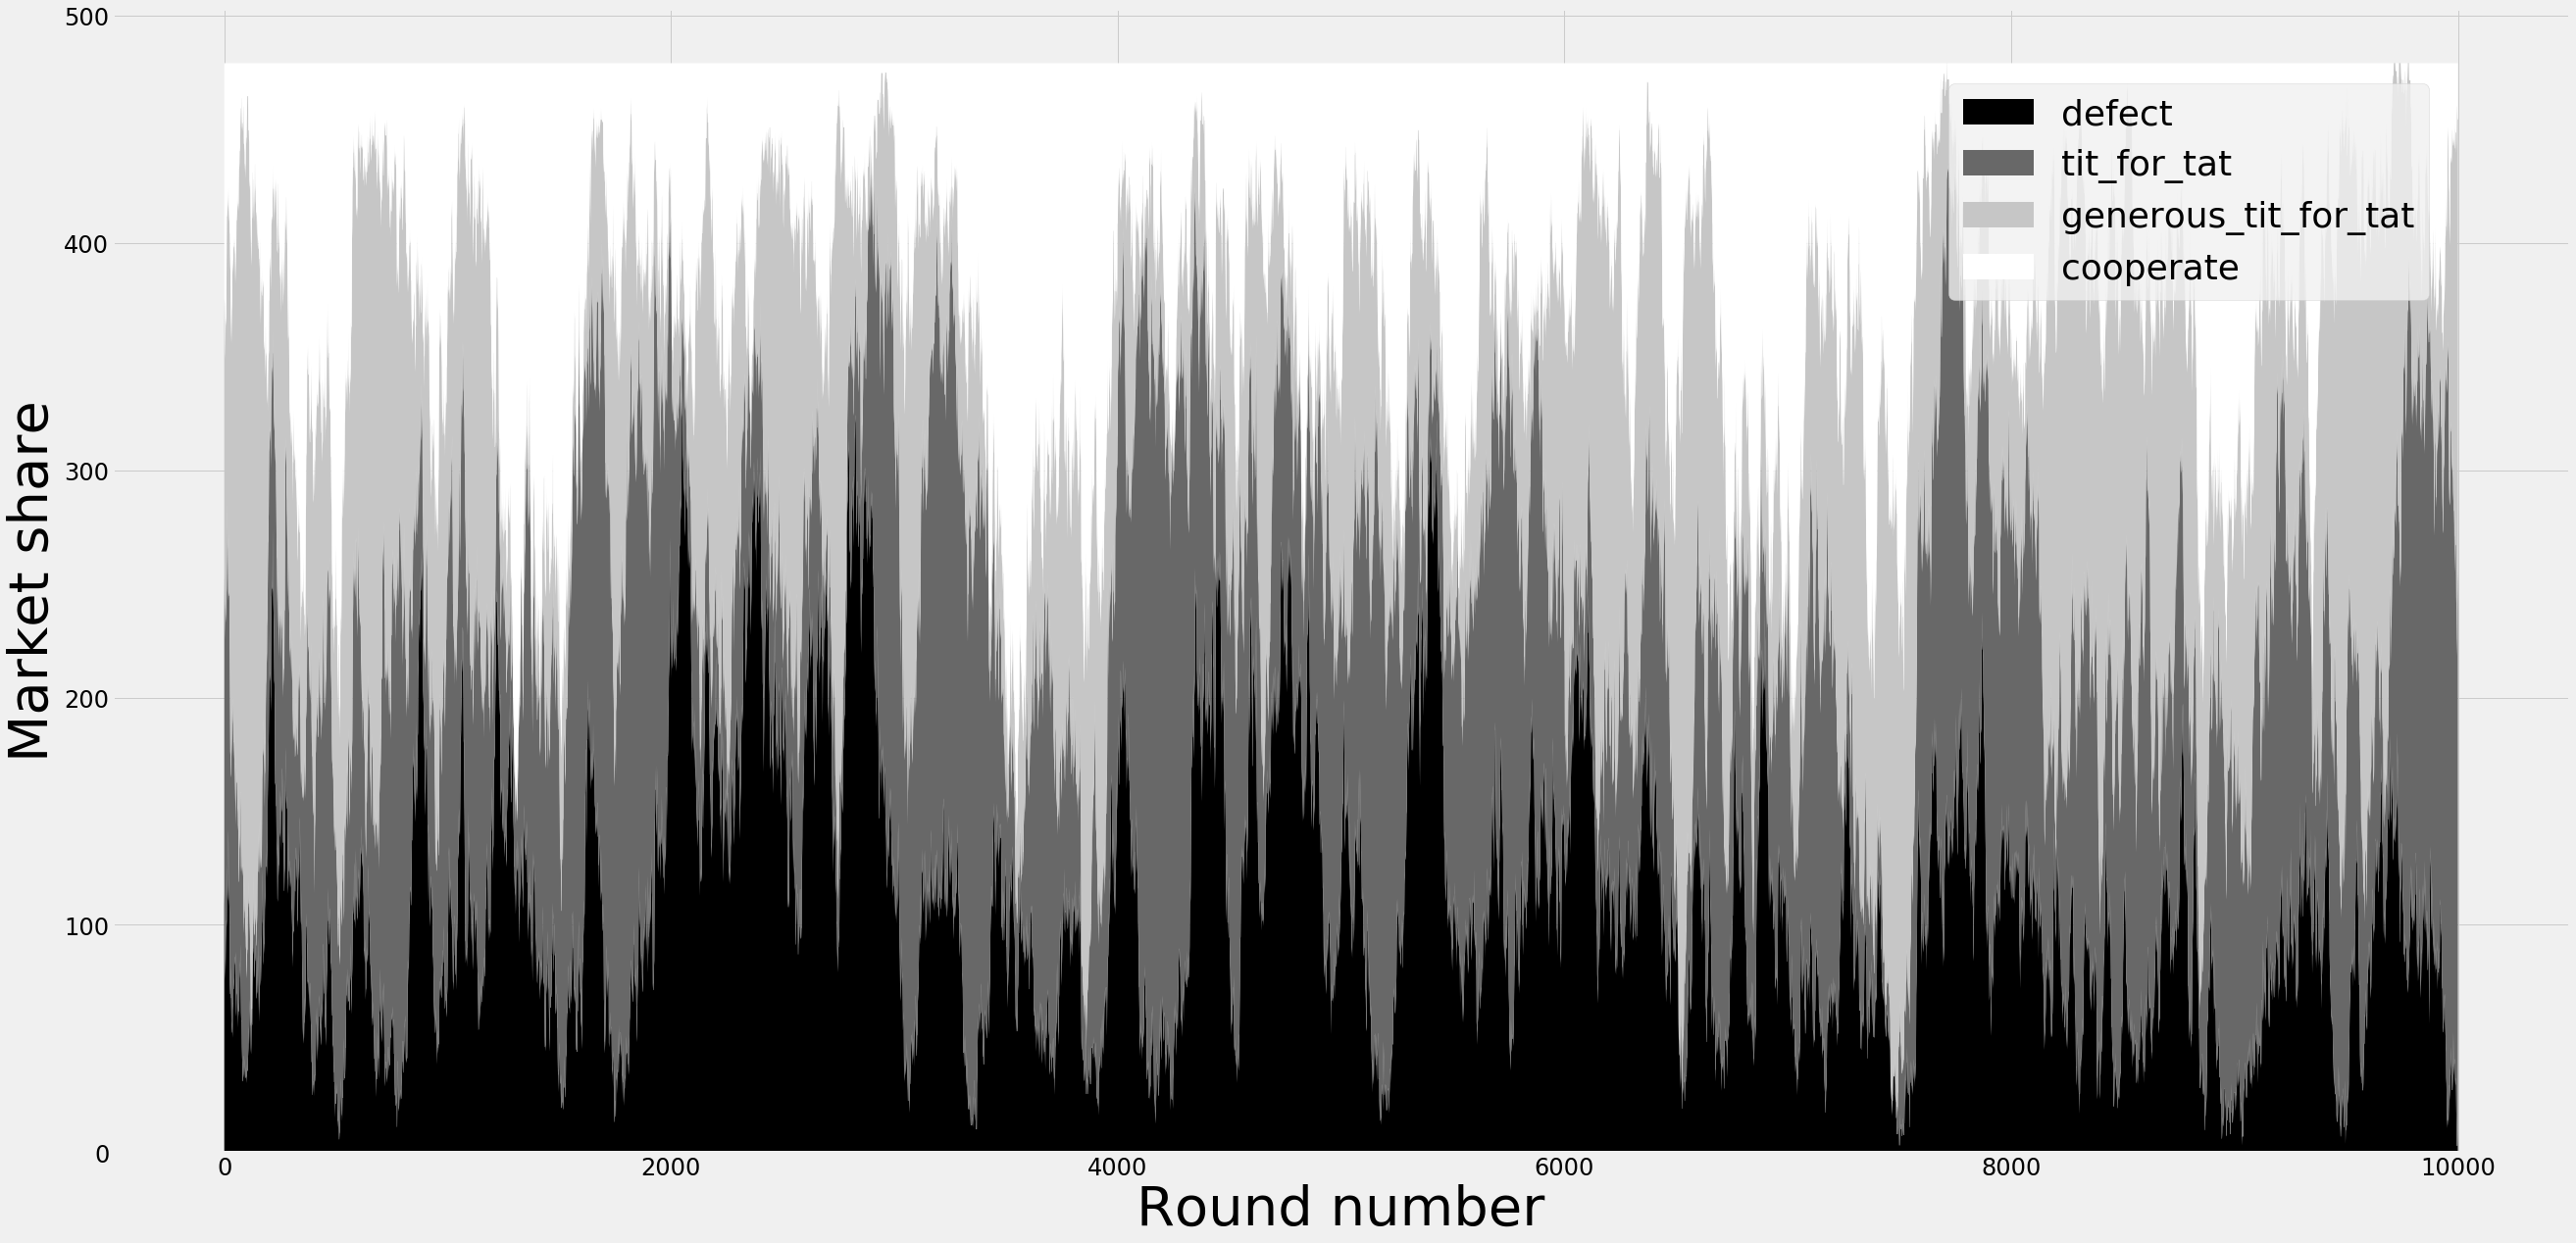

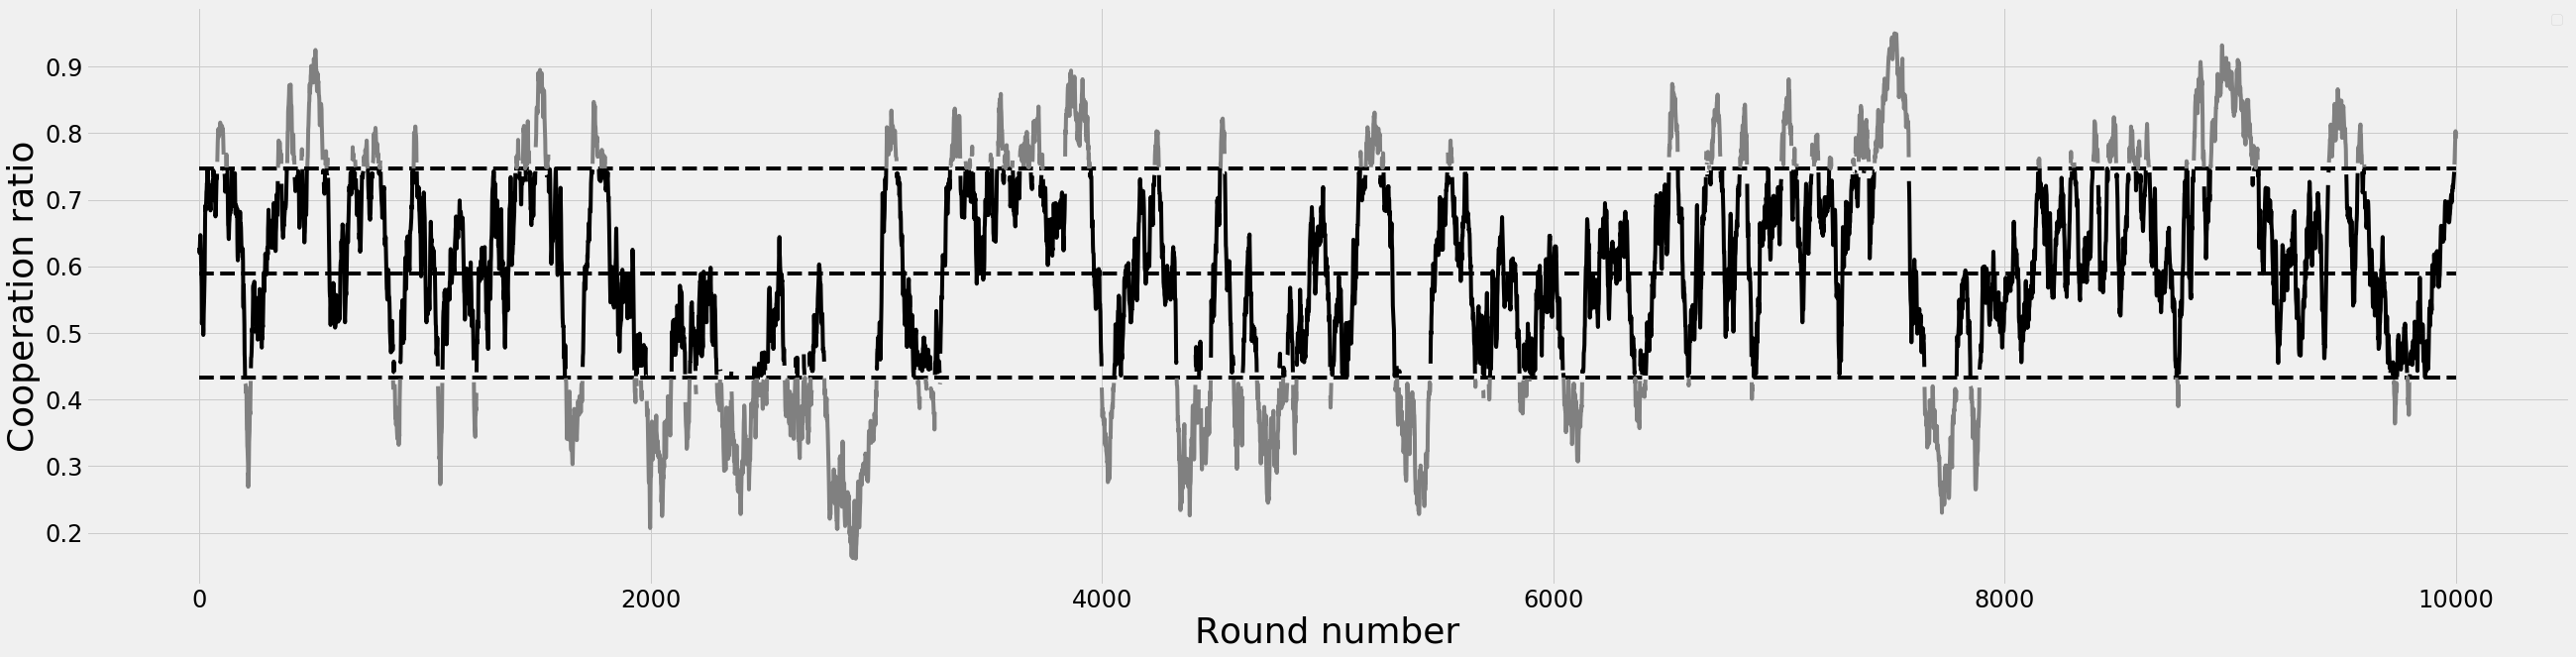

In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

tour_type = "pareto_m_min"
M = ["power", 2.5, 1]
R = [0.4, 1/10000]
D = [0.3, 1/10000]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed))